In [1]:
import acquire
import prepare

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=acquire.acquire_all()

In [3]:
df=prepare.prepare_store(df)

In [4]:
df.head(1)

,item,quantity,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,1,10.92


In [5]:
# pd.to_datetime(df.sale_date.str.split(' 00:00:00 GMT').str[0].str.split(', ').str[1],format='%d %b %Y')

In [6]:
# start_time = datetime.now()
# df.sale_date[:] = pd.to_datetime(df.sale_date,format='%a, %d %b %Y %H:%M:%S %Z').dt.date
# end_time = datetime.now()

# print("It took ",(end_time-start_time).seconds)

Text(0.5, 1.0, 'Sale Amount Distribution')

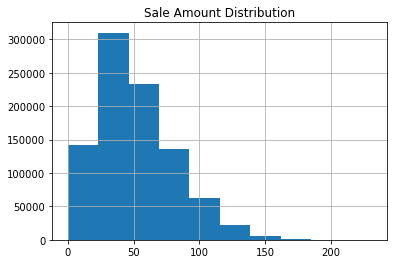

In [8]:
df.quantity.hist()
plt.title('Sale Amount Distribution')

Text(0.5, 1.0, 'Item Price Distribution')

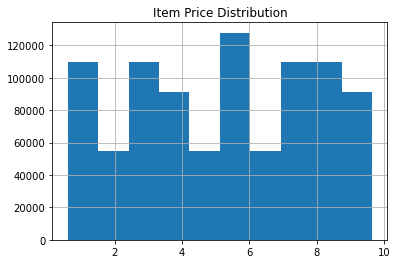

In [9]:
df.item_price.hist()
plt.title('Item Price Distribution')

In [10]:
# df= df.set_index('sale_date')

# df['month'] = df.index.month
# df['day_of_week'] = df.index.day_of_week

# df['sales_total'] = df.sale_amount*df.item_price

# df.sort_index()

In [11]:
df.reset_index().groupby(['store_id','item_id']).sale_date.nunique()

store_id  item_id
1         1          1826
          2          1826
          3          1826
          4          1826
          5          1826
                     ... 
10        46         1826
          47         1826
          48         1826
          49         1826
          50         1826
Name: sale_date, Length: 500, dtype: int64

### Looking at sales per item id per store over time

In [12]:
df.index.max()-df.index.min()+pd.Timedelta(days=1)

Timedelta('1826 days 00:00:00')

Based on time delta of 1826 days from max to min and the fact that when grouped by sales and item and looked at number of unique sale dates all values were 1826 can conclude have continuous dates

In [13]:
df = acquire.acquire_power_data()

In [14]:
df = prepare.prepare_power(df)

In [15]:
# df.index = pd.to_datetime(df.Date)

# df= df.sort_index()

# df['month'] = df.index.month
# df['year'] = df.index.year

In [16]:
df

,Date,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,,
2006-01-01,2006-01-01,1069.18400,0.000,0.000,0.000,1,2006
2006-01-02,2006-01-02,1380.52100,0.000,0.000,0.000,1,2006
2006-01-03,2006-01-03,1442.53300,0.000,0.000,0.000,1,2006
2006-01-04,2006-01-04,1457.21700,0.000,0.000,0.000,1,2006
2006-01-05,2006-01-05,1477.13100,0.000,0.000,0.000,1,2006
...,...,...,...,...,...,...,...
2017-12-27,2017-12-27,1263.94091,394.507,16.530,411.037,12,2017
2017-12-28,2017-12-28,1299.86398,506.424,14.162,520.586,12,2017
2017-12-29,2017-12-29,1295.08753,584.277,29.854,614.131,12,2017


<Figure size 1728x720 with 0 Axes>

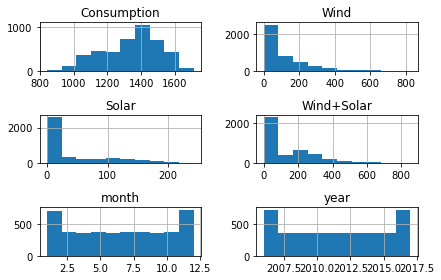

In [17]:
plt.figure(figsize=(24,10))
df.hist()
plt.tight_layout()